In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns


# Carregamento dos dados

In [2]:
df_dsa = pd.read_csv("dataset.csv")

In [4]:
df_dsa.shape


(3000, 7)

In [5]:
df_dsa.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [6]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [8]:
df_dsa.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


# Resumo estatistico

In [14]:
# procurando valores nulos
df_dsa.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [15]:
# procurando valores faltantes
df_dsa.isna().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [16]:
# resumo
df_dsa.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [17]:
# resumo de valor aluguel
df_dsa["valor_aluguel"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

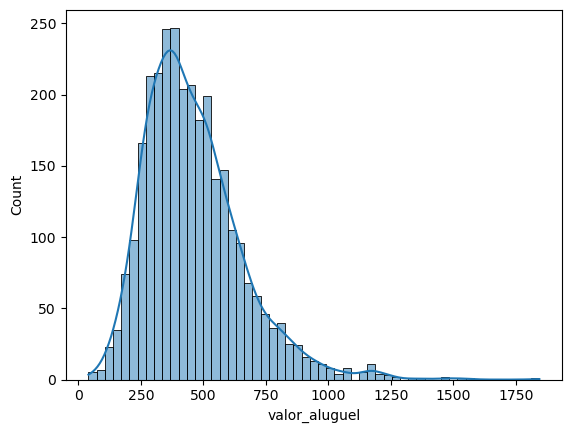

In [18]:
# histograma da variavel alvo
sns.histplot(data = df_dsa, x="valor_aluguel", kde=True)

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

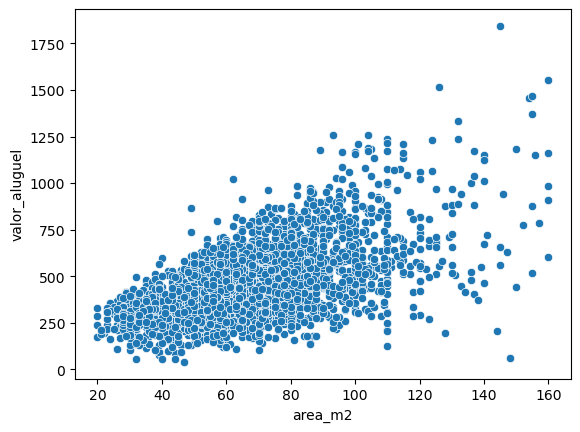

In [19]:
# dispersão
sns.scatterplot(data = df_dsa, x = "area_m2", y="valor_aluguel")

In [21]:
# correlação entre variaveis
df_dsa[["valor_aluguel", "area_m2"]].corr()

,valor_aluguel,area_m2
valor_aluguel,1.000000,0.584878
area_m2,0.584878,1.000000


# Regressão linear simples metodo OLS(Ordinary Least Square)

In [27]:
# define y a variavel dependente
y = df_dsa["valor_aluguel"]

In [28]:
# define x a variavel independente
x = df_dsa["area_m2"]

In [29]:
# statsmodels requer a definição de uma variavel independente constante
x = sm.add_constant(x)

In [30]:
# Cria o modelo
modelo = sm.OLS(y, x)

In [31]:
# treinamento do modelo
resultado = modelo.fit()

In [32]:
# resultado
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          6.84e-275
Time:                        12:07:10   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.000     116.541     150.856
area_m2        4.8386      0.123     39.482      0.000       4.598       5.079
==============================================================================
Omnibus:                      206.173   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.379
Skew:                           0.448   Prob(JB):                     1.43e-96
Kurtosis:                       4.651   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
import matplotlib.pyplot as plt

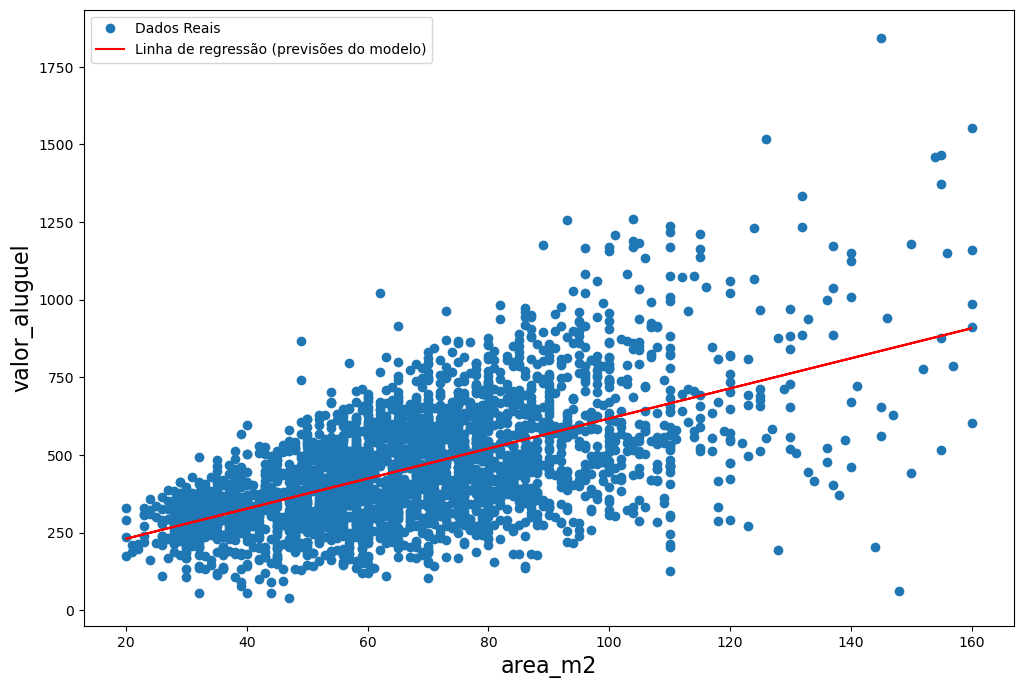

In [34]:
# plotando o resultado
plt.figure(figsize=(12, 8))
plt.xlabel("area_m2", size = 16)
plt.ylabel("valor_aluguel", size=16)
plt.plot(x["area_m2"], y, "o", label="Dados Reais")
plt.plot(x["area_m2"], resultado.fittedvalues, 'r-', label="Linha de regressão (previsões do modelo)")
plt.legend(loc="best")
plt.show()